In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")

sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     -- ------------------------------------- 0.8/12.8 MB 1.4 MB/s eta 0:00:09
     --- ------------------------------------ 1.0/12.8 MB 1.5 MB/s eta 0:00:08
     ---- ----------------------------------- 1.6/12.8 MB 1.6 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 1.8 MB/s eta 0:00:06
     --------- ------------------------------ 2.9/12.8 MB 2.0 MB/s eta 0:00:05
     ----------- ---------------------------- 3.7/12.8 MB 2.2 MB/s eta 0:00:05
     ------------- -------------------------- 4.2/12.8 MB 2.3 MB/s eta 0:00:04
     --------------- ------------------------ 5.0/12.8 MB 2.4 MB/s eta 0:00:04
     ----------------- ---------------------- 5.5/12.8 MB 2.4 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 2.5 MB/s

In [3]:
df = pd.read_csv('balanced_reviews_dataset2.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,reviewTime,review_length
0,A7MRWQD30ZG1,B002OKLUGW,AmaZonWindowShopper,"[0, 0]",the item was exactly as described but it makes...,4,NIce Product!,"07 1, 2013",24
1,A247P51OUO683W,B005LGUCRE,"M. Prentice ""Splaktar""","[1, 1]",i picked this up at the tmo store the build qu...,3,Does not work with cases and arm is a bit short,"06 22, 2012",204
2,A7M7JDSCN0HMM,B008DJIGR4,Paul Q,"[0, 0]",the case fits the phone well except around the...,1,"Poor fit around the volume button, skip this one","08 21, 2013",97
3,A2EK2UMX5LNCAI,B00687N0GK,Dave H,"[0, 0]",very compact but found it kinda difficult to p...,3,Wish it was easier to place/Remove the phone,"10 8, 2012",47
4,A4S2GMZIQKEHY,B004VN09LM,Eldude,"[0, 0]",off the top i will say that depending on who y...,3,Its...okay,"11 4, 2012",128
...,...,...,...,...,...,...,...,...,...
9995,A36XRXX2WQWAWC,B007Z0VXHM,Kanitra,"[0, 0]",for the price this bumper is pretty good its d...,3,decent,"12 14, 2012",39
9996,A2L0KSRC92EGK3,B00FUXV6QO,aaron,"[0, 0]",if you are looking for a cheap case to protect...,3,nothing smart about it!!!!!,"05 3, 2014",21
9997,A3PEM0PUG9YHD5,B00004WINT,usnrma,"[0, 0]",these are the exact ones that i was looking fo...,3,They are ok,"01 23, 2014",88
9998,A3LQVXPXFRZKGO,B0035R2QS4,vishal,"[0, 0]",a compete waste of money and expectations too ...,1,never worked,"04 23, 2014",26


In [4]:
df.shape

(10000, 9)

In [5]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'Rating',
       'summary', 'reviewTime', 'review_length'],
      dtype='object')

In [6]:
df.isnull().sum()

reviewerID       0
asin             0
reviewerName     0
helpful          0
reviewText       0
Rating           0
summary          0
reviewTime       0
review_length    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
for rating in sorted(df['Rating'].unique()):
    print(f"\n⭐ Rating {rating}")
    reviews = df[df['Rating'] == rating].tail(3)
    for _, row in reviews.iterrows():
        print(f"- {row['reviewText']}")



⭐ Rating 1
- 3000mah is roughly twice the capacity of an iphone 4 which i used for music and nike app while trail running the phone alone 1400mah could last 34 hours with audio gps and miscellaneous nearconstant activity it stands to reason that the anker 3000mah could at least double the usable span if not triple itafter a particular run i ran the phone down to 45 and plugged it into the anker while i entertained myself on the phone and waited for a long series of photographic exposures after an hour of charging the phone the anker had been drained and the phone was back on its own power without having been recharged further than another 15 by the ankerive got another battery cell thats at least four times heavier higher capacity also that doesnt selfdischarge nearly as badly as this but its half again as heavy as a loaded ultralight trail running backpack
- this is not the same useful juice pack i have come to expect from mophie saw it at the apple store today and bought it with out

In [9]:
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

In [10]:
min_word_counts = df.groupby('Rating')['word_count'].describe()
print(min_word_counts)


         count     mean        std  min   25%   50%    75%    max
Rating                                                           
1       2000.0  66.5740  57.399502  4.0  27.0  46.0   82.0  348.0
2       2000.0  79.1555  68.231980  4.0  31.0  53.5  102.0  348.0
3       2000.0  79.1350  71.236059  4.0  29.0  50.0  104.0  350.0
4       2000.0  82.5520  73.502752  4.0  30.0  54.0  106.0  349.0
5       2000.0  66.9580  64.793899  4.0  26.0  40.5   77.0  347.0


In [11]:
df['reviewText']

0       the item was exactly as described but it makes...
1       i picked this up at the tmo store the build qu...
2       the case fits the phone well except around the...
3       very compact but found it kinda difficult to p...
4       off the top i will say that depending on who y...
                              ...                        
9995    for the price this bumper is pretty good its d...
9996    if you are looking for a cheap case to protect...
9997    these are the exact ones that i was looking fo...
9998    a compete waste of money and expectations too ...
9999    good price fast shippingi bought sixone for ca...
Name: reviewText, Length: 10000, dtype: object

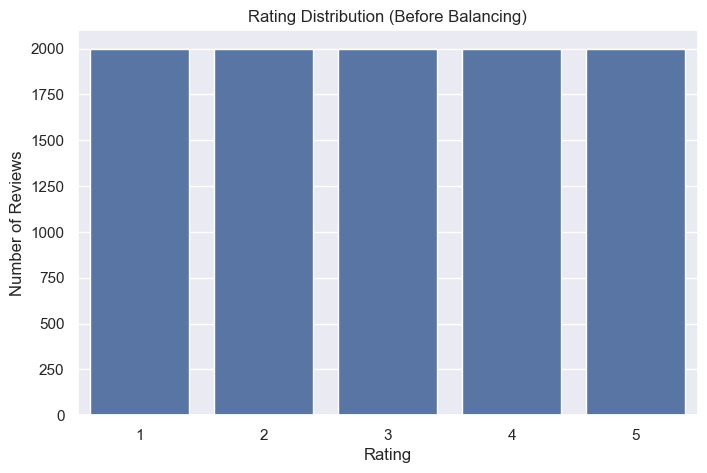

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution (Before Balancing)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

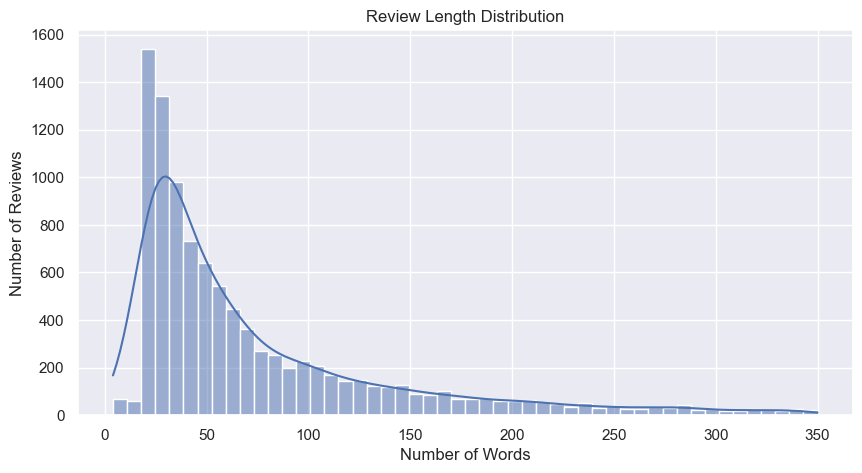

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='review_length', bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()


In [14]:
rating_counts = df['Rating'].value_counts().sort_index()

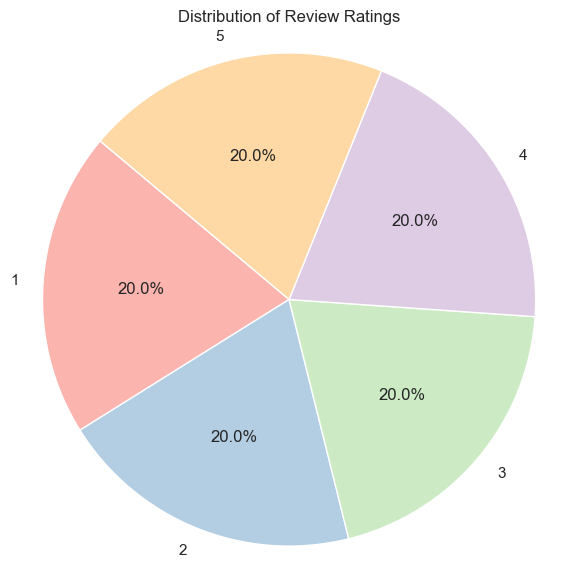

In [15]:
# Labels and sizes
labels = rating_counts.index.astype(str)
sizes = rating_counts.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

In [16]:
#  Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['Rating'], test_size=0.2, random_state=42,stratify=df['Rating'] )

In [17]:
def remove_stopwords_and_lemmatize(text):
    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if token.text not in stop_words and not token.is_stop and not token.is_space
    ]
    return ' '.join(tokens)


In [18]:
X_train = X_train.apply(remove_stopwords_and_lemmatize)
X_test = X_test.apply(remove_stopwords_and_lemmatize)

In [19]:
# Initialize and fit TF-IDF on training only
tfidf = TfidfVectorizer(max_features=5000)  # includes stopword removal
X_train_tfidf = tfidf.fit_transform(X_train)
# 3. Transform test using the same fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

In [48]:
print(X_train.sample(5).values)

['great product cofortable easy setup feature wonderful battery charger include recharge device anytime'
 'purchase gift recipient like objective review item reveal poor quality regard fitting item phone sit make phone twice thicki suppose want ble phone serve purpose think protect phone extra material 35'
 'pretty look like try cheap seller basically cut burn hole fit camera home button 3 protective screen yellow tint bump plastic material burn avoid product'
 'strap long cut half husband share need section size apart excessivelylong strap case nice not problem snap phone place slide locking mechanism phone possibly fall'
 'purchase high gloss clear frosted matte inside version case show white color lg g2 guy tend carry phone pocket vacation week basically blue jean 10 straight day enjoy fact not iron week phone case turn blue edge similar problem white incipio dualpro case leave want case show phone case lack ability resist stain']


In [52]:
# Initialize and train
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.54      0.58      0.56       400
           2       0.31      0.29      0.30       400
           3       0.34      0.31      0.33       400
           4       0.42      0.43      0.42       400
           5       0.55      0.57      0.56       400

    accuracy                           0.44      2000
   macro avg       0.43      0.44      0.44      2000
weighted avg       0.43      0.44      0.44      2000



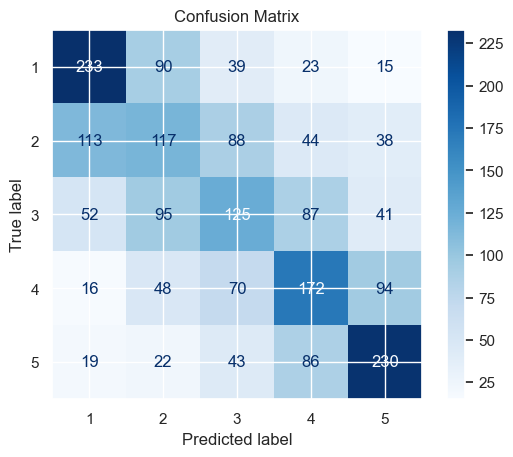

In [54]:
# Classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
